In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Loading the Happiness Score Dataset.

In [3]:
HappyScoreDF = pd.read_csv('happiness_score_dataset.csv')

In [4]:
HappyScoreDF.shape  #total rows and columns in the DataFrame

(158, 12)

In [5]:
HappyScoreDF.head(50)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### Getting the basic summary and statistical information of the data.

In [6]:
HappyScoreDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
HappyScoreDF.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Checking for missing or null values in dataset.

In [8]:
HappyScoreDF.isnull().sum() 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no values missing from the data set.

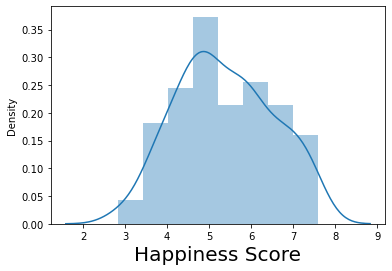

In [9]:
sns.distplot(HappyScoreDF['Happiness Score'])
plt.xlabel('Happiness Score',fontsize=20)
plt.show()

### This is a Regression Problem since the target variable / Label column (Happiness Score) has continuous type of Data.

#### Finding Correlation

In [10]:
hs_correlation=HappyScoreDF.corr()

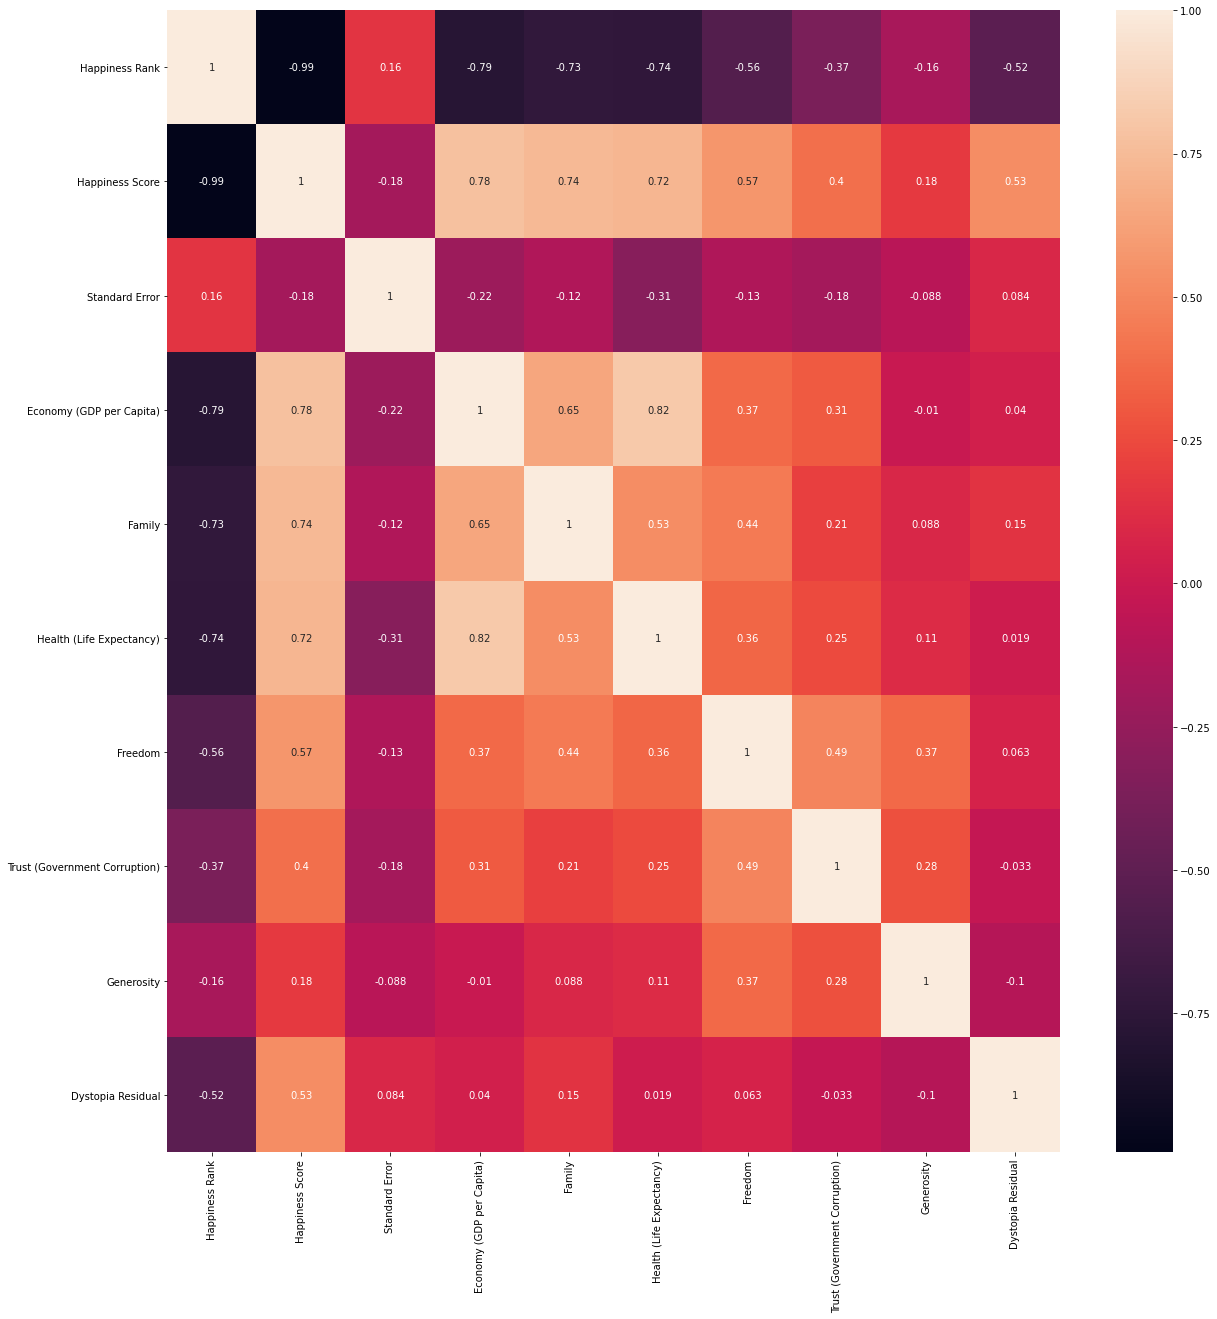

In [11]:
plt.figure(figsize=(20,21))
sns.heatmap(hs_correlation,annot=True)
plt.show()

From the Heatmap it is clear that Happiness rank has a negative correlation very close to -1 with Happiness score. While, Economy, Family and Health have the highest correlation with Happiness score, Freedom and Dystopia Residual and Trust also have a considerable correlation.

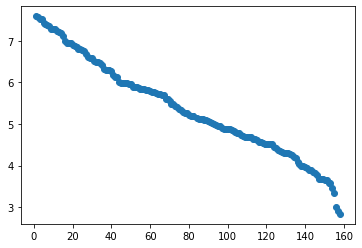

In [12]:
plt.scatter(HappyScoreDF["Happiness Rank"],HappyScoreDF["Happiness Score"])

##### Dropping Columns "Country" and"Region" since they have No effect on Happiness Score.

In [13]:
HappyScoreDF.drop(["Country","Region"],axis=1,inplace=True)


#### Dropping Column "Happiness Rank" since it has a very high negative correlation with Happiness Score.

In [14]:
HappyScoreDF.drop(["Happiness Rank"],axis=1,inplace=True)

In [15]:
HappyScoreDF.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Visualising Data Distribution for every column

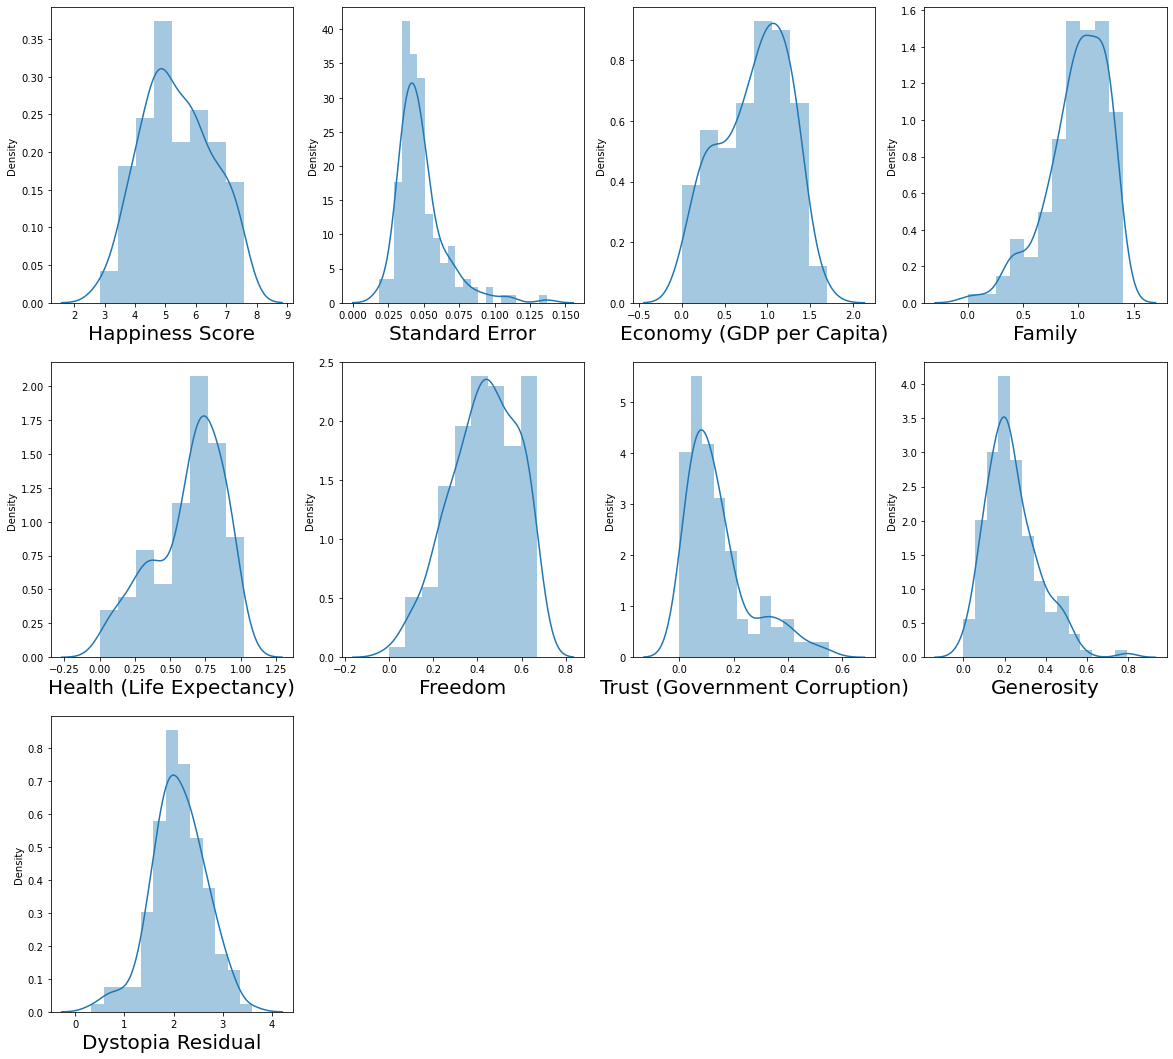

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in HappyScoreDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(HappyScoreDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There is skewness present in the Data Distribution.

### Detecting The Outliers

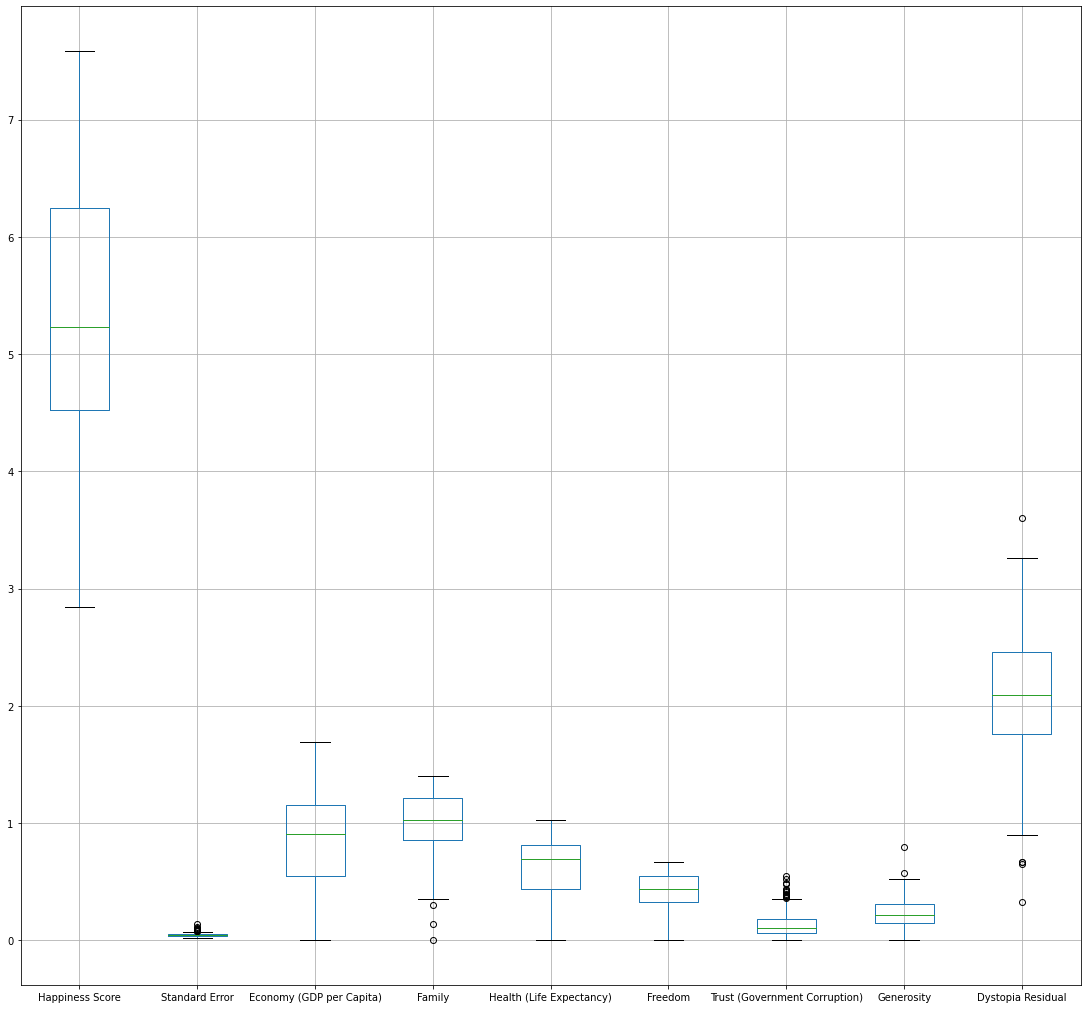

In [17]:
HappyScoreDF.boxplot(figsize=[19,18])

plt.show()

From the Boxplot it is evident that "Standard Error", "Family", "Trust", "Generosity", and "Dystopia" have outliers present.

In [18]:
HappyScoreDF.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [19]:
Outlier_Features = HappyScoreDF[['Standard Error',"Trust (Government Corruption)", 'Family','Generosity','Dystopia Residual']]

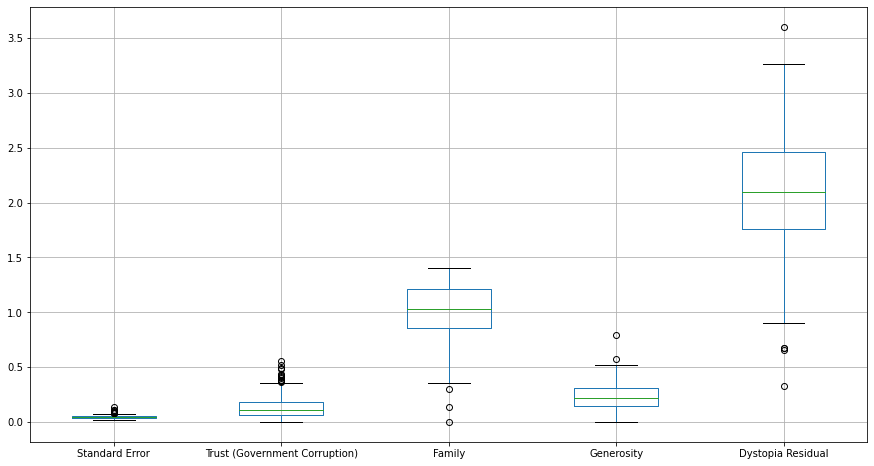

In [20]:
Outlier_Features.boxplot(figsize=[15,8])

plt.show()

### Removing The Outliers

#### Using IQR Method

In [21]:
df = HappyScoreDF.copy()

In [22]:
feat = ['Standard Error',"Trust (Government Corruption)", 'Family','Generosity','Dystopia Residual']

In [23]:
indxdrop = np.array([])
for colm in df[feat]:
    q1 = Outlier_Features[colm].quantile(0.25)
    q3 = Outlier_Features[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = Outlier_Features[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [24]:
indxdrop

array([ 39.,  40.,  62.,  64.,  93.,  96., 100., 115., 125., 156.,   0.,
         2.,   3.,   5.,   7.,   8.,  16.,  19.,  23.,  27.,  71.,  90.,
       129., 153., 147., 152., 157.,  33., 128.,  13.,  71., 131., 153.,
       155.])

In [25]:
df = df.drop(indxdrop)

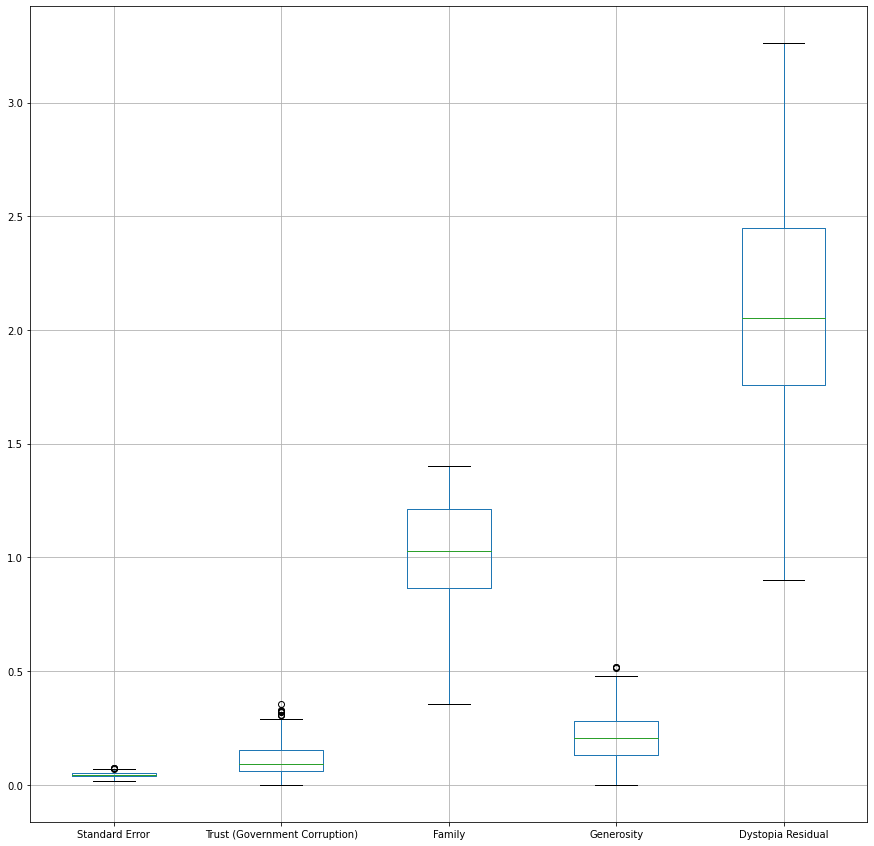

In [26]:
df[feat].boxplot(figsize=[15,15])

plt.show()

A good amount of outliers has been removed.

In [27]:
df.shape

(126, 9)

In [28]:
HappyScoreDF.shape

(158, 9)

##### Data loss %:

In [29]:
loss=(158-126)/158 * 100
loss

20.253164556962027

20% loss is not ideal

#### Using Z score

In [30]:
df2 = HappyScoreDF.copy()

In [31]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [32]:
df3.shape

(149, 9)

In [33]:
df2.shape

(158, 9)

##### Data loss %:

In [34]:
loss=(158-149)/158 * 100
loss

5.69620253164557

5.7% Data loss is within acceptable range

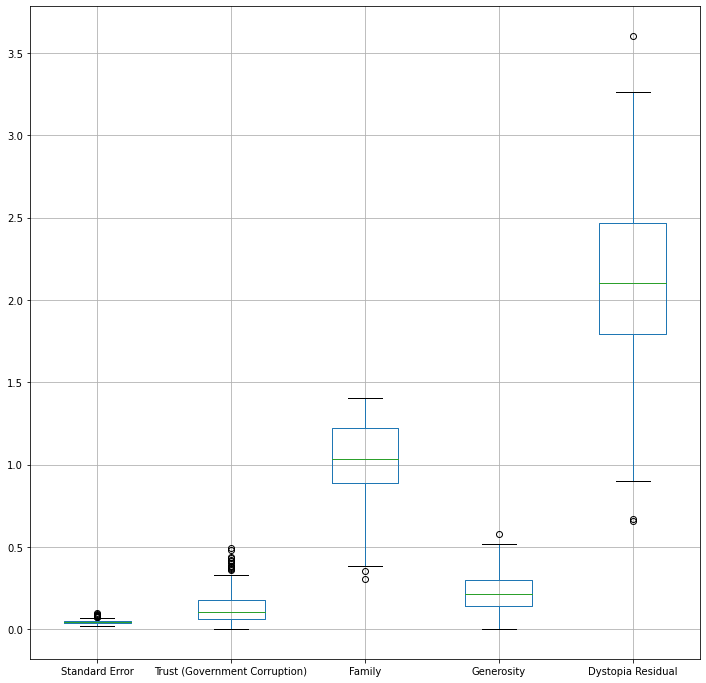

In [35]:
df3[feat].boxplot(figsize=[12,12])

plt.show()

Some amount of outliers has been removed.

In [36]:
HappyScoreDF=df3.copy()

In [37]:
HappyScoreDF.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

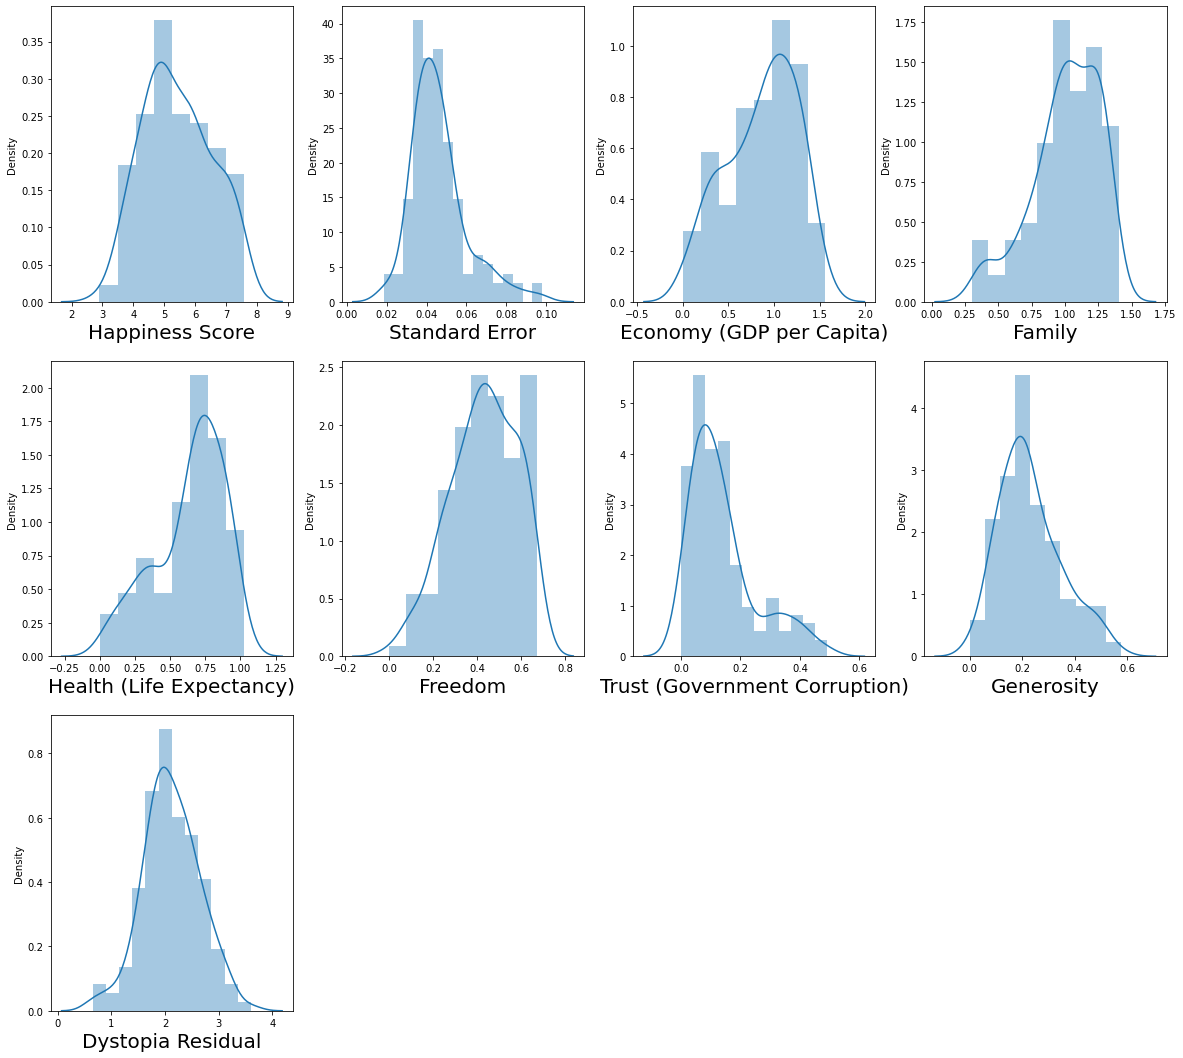

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in HappyScoreDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(HappyScoreDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Outlier removal has reduced the Skewness to some extent.

### Normalizing Data Distribution


Replacing 0 values in dataset with their respective column median using Simple Imputer

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
(HappyScoreDF == 0).sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           0
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [41]:
si = SimpleImputer(missing_values = 0,strategy = 'median',verbose = 0 )

In [42]:
featr = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

In [43]:
si = si.fit(HappyScoreDF[featr])

In [44]:
HappyScoreDF[featr] = si.transform(HappyScoreDF[featr])

In [45]:
(HappyScoreDF== 0).sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [46]:
HappyScoreDF.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.381261
Family                          -0.811340
Health (Life Expectancy)        -0.732954
Freedom                         -0.327105
Trust (Government Corruption)    1.284999
Generosity                       0.694540
Dystopia Residual               -0.021144
dtype: float64

Substantial Skewness exists in columns: 'Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)', and 'Generosity'.

In [47]:
Skewd = ['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']

#### Normalizing Data Distribution using log transformer

In [48]:
logtr = HappyScoreDF.copy()



In [49]:
for col in logtr[Skewd]:
    logtr[col] = np.log(logtr[col])
    


In [50]:
logtr.skew()

Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.381261
Family                          -1.611713
Health (Life Expectancy)        -1.982557
Freedom                         -0.327105
Trust (Government Corruption)   -0.852804
Generosity                      -2.502847
Dystopia Residual               -0.021144
dtype: float64

Skewness still has not been corrected to within acceptable range

#### Normalizing Data Distribution using PowerTransformer

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [53]:
df4 = HappyScoreDF[Skewd]

In [54]:
transformed= powtrans.fit_transform(df4)

In [55]:
type(transformed)

numpy.ndarray

In [56]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [57]:
transformed.isnull().sum()

Standard Error                   0
Family                           0
Health (Life Expectancy)         0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [58]:
transformed.skew()

Standard Error                  -0.031216
Family                          -0.148528
Health (Life Expectancy)        -0.182912
Trust (Government Corruption)    0.179009
Generosity                       0.033375
dtype: float64

In [59]:
transformed.index = HappyScoreDF.index

In [60]:
HappyScoreDF[Skewd] = transformed[Skewd]

In [61]:
HappyScoreDF.skew()

Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.381261
Family                          -0.148528
Health (Life Expectancy)        -0.182912
Freedom                         -0.327105
Trust (Government Corruption)    0.179009
Generosity                       0.033375
Dystopia Residual               -0.021144
dtype: float64

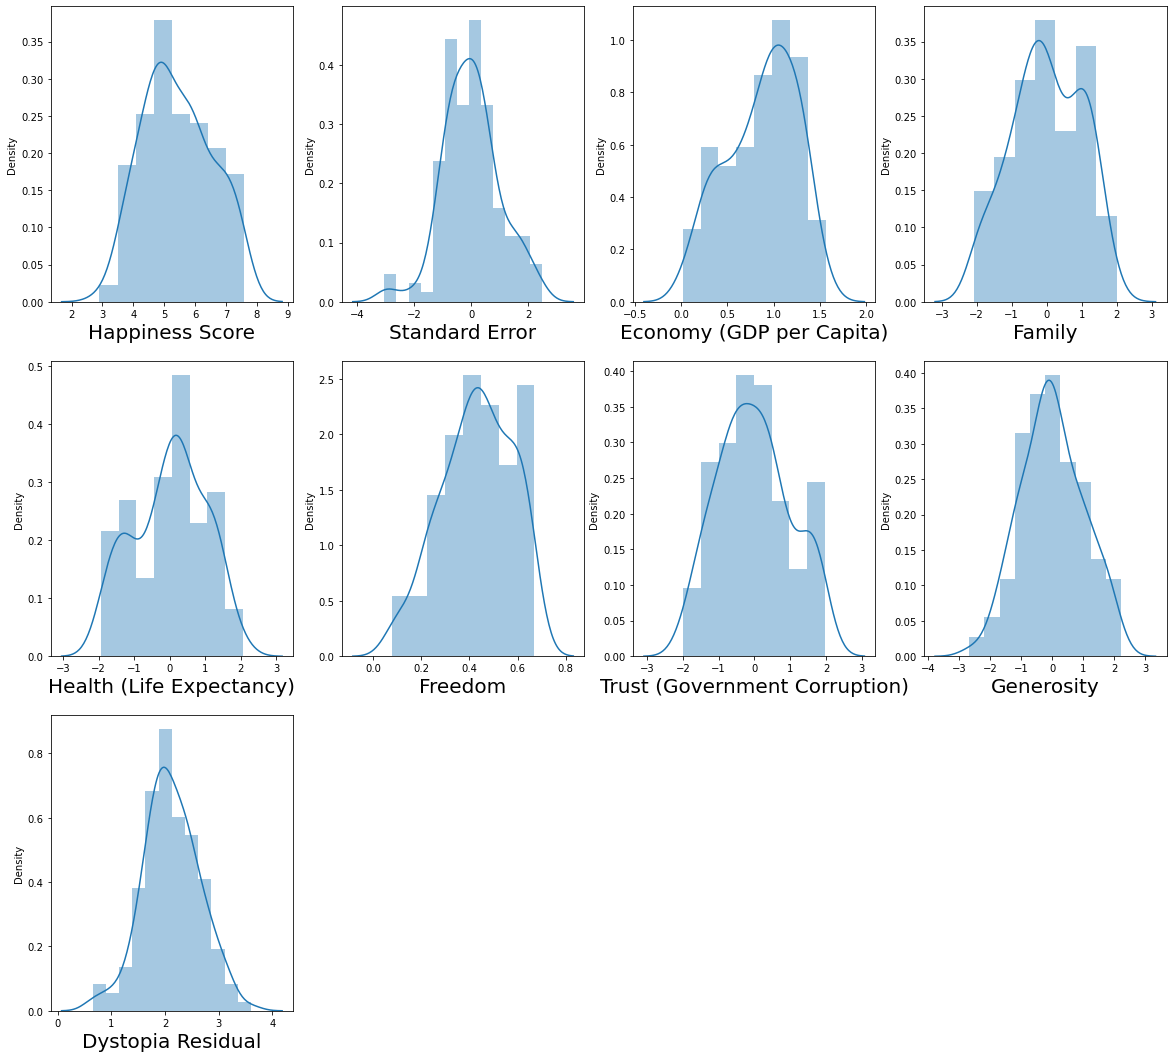

In [62]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in HappyScoreDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(HappyScoreDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Distributions look much more Normalised now

# Regression Model Building 

In [63]:
X = HappyScoreDF.drop(columns = ['Happiness Score'])
y = HappyScoreDF['Happiness Score']

In [64]:
X.shape

(149, 8)

In [65]:
y.shape

(149,)

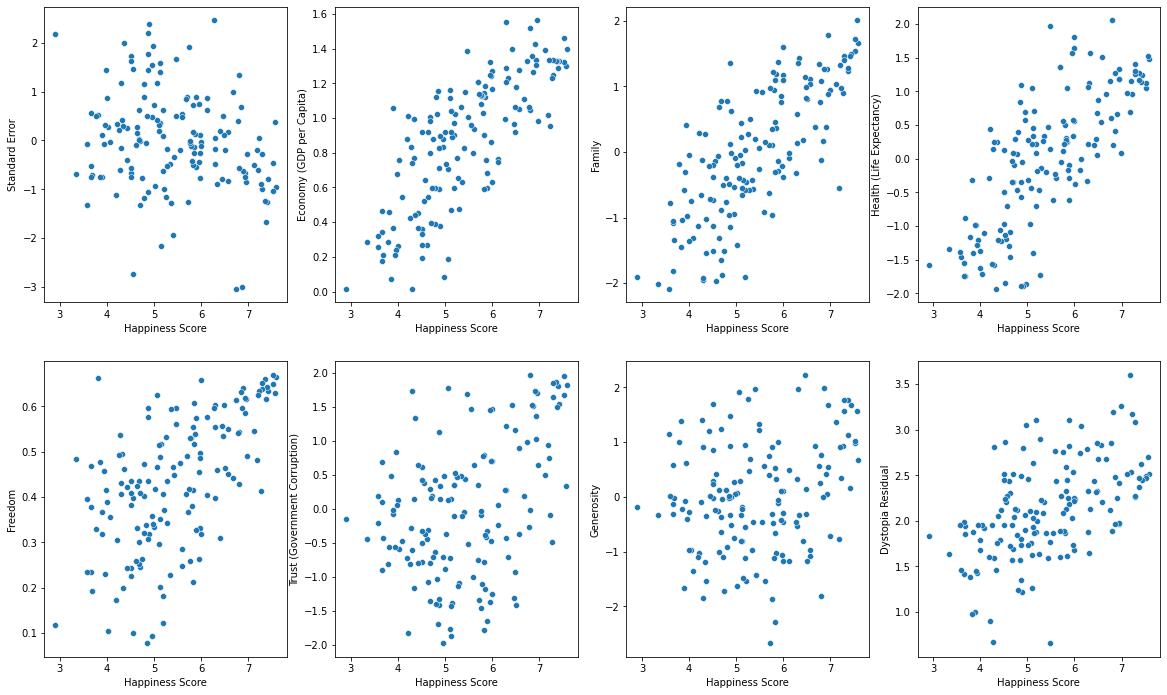

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
pltnum=1
for col in X:
    if pltnum<=9:
        ax = plt.subplot(4,4,pltnum)
        sns.scatterplot(y,X[col])
        
    pltnum+=1
plt.show()


Economy, Family and Health have the highest correlation with Happiness score and play an important role in estimating Happiness score.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
X_scaled = StandardScaler().fit_transform(X) #scaling the feature data

In [69]:
X_scaled

array([[-0.95033703,  1.38938721,  1.65888016, ...,  1.81767985,
         0.66643972,  0.7568764 ],
       [ 0.37856182,  1.14161348,  2.00912496, ...,  0.32614342,
         1.56291968,  1.10929978],
       [-1.04140135,  1.20253757,  1.73078528, ...,  1.95130762,
         0.98479181,  0.70850719],
       ...,
       [-1.32081011, -1.44292503, -2.08738878, ..., -0.20448847,
         1.14099647, -0.32213507],
       [-0.69272644, -1.53018115, -2.01044293, ..., -0.45069555,
        -0.32571122, -0.9307015 ],
       [ 2.17876604, -2.24398729, -1.90641014, ..., -0.1581135 ,
        -0.18156738, -0.54943602]])

Splitting the data into training and testing sets

In [115]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.31, random_state = 1)

In [116]:
y_train.head()

41     6.130
37     6.298
120    4.514
143    3.845
122    4.507
Name: Happiness Score, dtype: float64

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [119]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()


### Training the Models 

In [120]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)

SVR()

All models have been trained.

### Linear Regression Model

In [121]:
y_lr_pred = lr.predict(x_test)

####  R2 Score

In [122]:
r2_score(y_test,y_lr_pred)

0.9951741261647465

#### Mean Squared Error 

In [123]:
mean_squared_error(y_test,y_lr_pred)

0.005006785765399627

### Support Vector Regression Model

In [124]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [125]:
r2_score(y_test,y_svr_pred)

0.9790622001065685

#### Mean Squared Error

In [126]:
mean_squared_error(y_test,y_svr_pred)

0.021722714278068714

###  Random Forest Regression Model

In [127]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [128]:
r2_score(y_test,y_rf_pred)

0.9453736567554766

#### Mean Squared Error

In [129]:
mean_squared_error(y_test,y_rf_pred)

0.05667417075319169

### XGB Regression Model 

In [130]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [131]:
r2_score(y_test,y_xg_pred)

0.9240053685165488

#### Mean Squared Error

In [132]:
mean_squared_error(y_test,y_xg_pred)

0.07884351148565634

### Cross Validating the Models 

In [133]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

Cross Validating Linear Regression Model

In [134]:
cross_val_score(lr,X_scaled,y,cv=ShuffleSplit(5)).mean()

0.9930869097686585

Cross Validating SV Regression Model

In [135]:
cross_val_score(SV,X_scaled,y,cv=ShuffleSplit(5)).mean()

0.9070440836195285

Cross Validating RandomForest Regression Model

In [136]:
cross_val_score(rf,X_scaled,y,cv=ShuffleSplit(5)).mean()

0.8727470236853747

Cross Validating XGB Model

In [137]:
cross_val_score(xg,X_scaled,y,cv=ShuffleSplit(5)).mean()

0.894039053103603

### From comparing the R2 and the CV scores of the models, it is determined that Linear Regression model is the best pick.

The linear regression model has r2 score = 0.9951741261647466 and Cross Validation score = 0.9930869097686585

Further HyperParameter Tuning Not Required.

In [138]:
print('Best Model : Linear Regression Model',end='\n')
print('Score =', lr.score(x_test,y_test)*100)

Best Model : Linear Regression Model
Score = 99.51741261647466


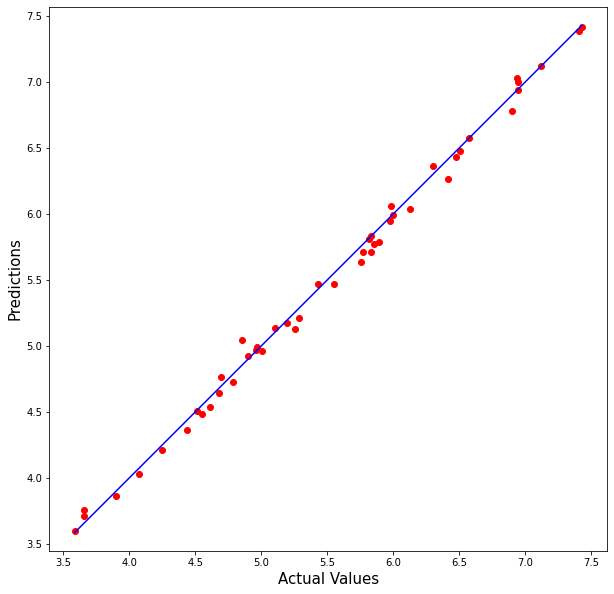

In [139]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_lr_pred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_lr_pred), max(y_test))
p2 = min(min(y_lr_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [140]:
import joblib
joblib.dump(lr,"BestModel.pkl")

['BestModel.pkl']

In [141]:
mod=joblib.load("BestModel.pkl")

In [142]:
print(mod.predict(x_test))

[3.59640253 4.96376768 5.83166636 5.17434585 5.13957219 4.76192603
 4.96942903 5.71137429 6.0605405  5.63292919 7.3860003  6.93638049
 4.92667195 7.12298728 5.71404079 6.26085093 5.21430895 6.47637808
 5.46859771 6.35899349 4.36492622 3.71485183 6.42815424 4.03155399
 4.5361564  6.77719562 5.7743236  5.78377845 4.99335065 4.72987447
 4.21601699 5.04341943 5.99017275 3.86691245 6.57354048 6.03471521
 4.64559888 4.50747352 7.00005293 4.4829885  3.7589046  5.46950404
 5.12612719 7.03047378 7.41683654 5.94894573 5.81259072]
